# Deep Learning Term Project for ECG (DIL700)

## Imports

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.utils import class_weight
import warnings
import os
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from general_functions import *
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Add, Activation, Softmax
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.optimizers import Adam


from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

## Loading Dataset

Collect all the data from the csv files

In [2]:
train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')

In [3]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
print(train_df[187].unique())

[0. 1. 2. 3. 4.]


In [6]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Paced']

In [7]:
print('Number of samples in data:')
print(labels[0],':', len(train_df[train_df[187]==0]))
print(labels[1],':', len(train_df[train_df[187]==1]))
print(labels[2],':', len(train_df[train_df[187]==2]))
print(labels[3],':', len(train_df[train_df[187]==3]))
print(labels[4],':', len(train_df[train_df[187]==4]))

Number of samples in data:
Normal : 72471
Artial Premature : 2223
Premature ventricular contraction : 5788
Fusion of ventricular and normal : 641
Paced : 6431


In [8]:
print('Number of samples in data:')
print(labels[0],':', len(test_df[test_df[187]==0]))
print(labels[1],':', len(test_df[test_df[187]==1]))
print(labels[2],':', len(test_df[test_df[187]==2]))
print(labels[3],':', len(test_df[test_df[187]==3]))
print(labels[4],':', len(test_df[test_df[187]==4]))

Number of samples in data:
Normal : 18118
Artial Premature : 556
Premature ventricular contraction : 1448
Fusion of ventricular and normal : 162
Paced : 1608


## Bagging/Bootstrapping (sampling with replacement)

In [9]:
# from sklearn.utils import resample
# df_1=train_df[train_df[187]==1]
# df_2=train_df[train_df[187]==2]
# df_3=train_df[train_df[187]==3]
# df_4=train_df[train_df[187]==4]
# df_0=(train_df[train_df[187]==0]).sample(n=2000,random_state=42)

# df_1_upsample=resample(df_1,replace=True,n_samples=2000,random_state=123)
# df_2_upsample=resample(df_2,replace=True,n_samples=2000,random_state=124)
# df_3_upsample=resample(df_3,replace=True,n_samples=2000,random_state=125)
# df_4_upsample=resample(df_4,replace=True,n_samples=2000,random_state=126)

# train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

## Create feautures and labels for dataset

Create different dataframes for training/testing data and labels.
Also OneHotEncoding for the labels and renaming the classes

In [10]:
train_X = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]

train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2, random_state=82)

train_y_nn = pd.get_dummies(train_y, columns=[1])
train_y_nn = train_y_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

valid_y_nn = pd.get_dummies(valid_y, columns=[1])
valid_y_nn = valid_y_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

test_X = test_df.iloc[:, :-1]
test_y = test_df.iloc[:, -1]
test_y_nn = pd.get_dummies(test_y, columns=[1])
test_y_nn = test_y_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

In [11]:
train_X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
64726,1.000000,0.796117,0.337379,0.101942,0.118932,0.118932,0.070388,0.063107,0.070388,0.067961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22763,0.987433,0.903052,0.495512,0.143627,0.161580,0.202873,0.177738,0.175943,0.177738,0.168761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73919,1.000000,0.883721,0.213953,0.000000,0.079070,0.134884,0.106977,0.148837,0.227907,0.186047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51329,0.971717,0.709091,0.117172,0.008081,0.109091,0.086869,0.092929,0.072727,0.074747,0.062626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65634,1.000000,0.755747,0.528736,0.336207,0.181034,0.086207,0.040230,0.017241,0.014368,0.011494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38510,0.975357,0.941634,0.498054,0.000000,0.068742,0.125811,0.057069,0.050584,0.044099,0.040208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19805,0.990672,0.777985,0.139925,0.037313,0.098881,0.102612,0.115672,0.111940,0.110075,0.123134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41091,1.000000,0.905405,0.705405,0.354054,0.170270,0.124324,0.102703,0.059459,0.062162,0.037838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4546,1.000000,0.510791,0.000000,0.089928,0.089928,0.118705,0.111511,0.115108,0.097122,0.107914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
train_y

64726    0.0
22763    0.0
73919    1.0
51329    0.0
65634    0.0
        ... 
38510    0.0
19805    0.0
41091    0.0
4546     0.0
77955    2.0
Name: 187, Length: 70043, dtype: float64

In [13]:
train_y_nn

,N,S,V,F,Q
64726,1,0,0,0,0
22763,1,0,0,0,0
73919,0,1,0,0,0
51329,1,0,0,0,0
65634,1,0,0,0,0
...,...,...,...,...,...
38510,1,0,0,0,0
19805,1,0,0,0,0
41091,1,0,0,0,0
4546,1,0,0,0,0


In [14]:
valid_X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
30886,0.865258,0.655218,0.260238,0.030383,0.000000,0.079260,0.126816,0.120211,0.107001,0.105680,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72653,0.931579,0.836842,0.121053,0.028947,0.197368,0.218421,0.171053,0.189474,0.205263,0.197368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37071,0.917241,0.562069,0.106897,0.117241,0.151724,0.120690,0.096552,0.089655,0.079310,0.075862,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42520,1.000000,0.862797,0.546174,0.081794,0.092348,0.197889,0.327177,0.343008,0.374670,0.369393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72974,1.000000,0.940711,0.288538,0.000000,0.047431,0.122530,0.102767,0.122530,0.225296,0.237154,...,0.371542,0.363636,0.359684,0.367589,0.367589,0.359684,0.363636,0.351779,0.379447,0.375494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58341,1.000000,0.935412,0.492205,0.144766,0.216036,0.202673,0.200445,0.189310,0.182628,0.171492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
54057,0.896382,0.722039,0.440789,0.203947,0.024671,0.000000,0.032895,0.055921,0.069079,0.062500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18964,0.971875,0.925000,0.634375,0.362500,0.075000,0.065625,0.109375,0.103125,0.187500,0.212500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26375,0.974227,0.819588,0.628866,0.422680,0.237113,0.128866,0.108247,0.154639,0.149485,0.139175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
valid_y

30886    0.0
72653    1.0
37071    0.0
42520    0.0
72974    1.0
        ... 
58341    0.0
54057    0.0
18964    0.0
26375    0.0
74760    2.0
Name: 187, Length: 17511, dtype: float64

In [16]:
valid_y_nn

,N,S,V,F,Q
30886,1,0,0,0,0
72653,0,1,0,0,0
37071,1,0,0,0,0
42520,1,0,0,0,0
72974,0,1,0,0,0
...,...,...,...,...,...
58341,1,0,0,0,0
54057,1,0,0,0,0
18964,1,0,0,0,0
26375,1,0,0,0,0


In [17]:
test_X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
test_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64

In [19]:
test_y_nn

,N,S,V,F,Q
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21887,0,0,0,0,1
21888,0,0,0,0,1
21889,0,0,0,0,1
21890,0,0,0,0,1


## Dataset Distribution

### Training set

In [20]:
train_df[187]=train_df[187].astype(int)
equilibre_train=train_df[187].value_counts(sort=False)
print(equilibre_train)

0    72471
1     2223
2     5788
3      641
4     6431
Name: 187, dtype: int64


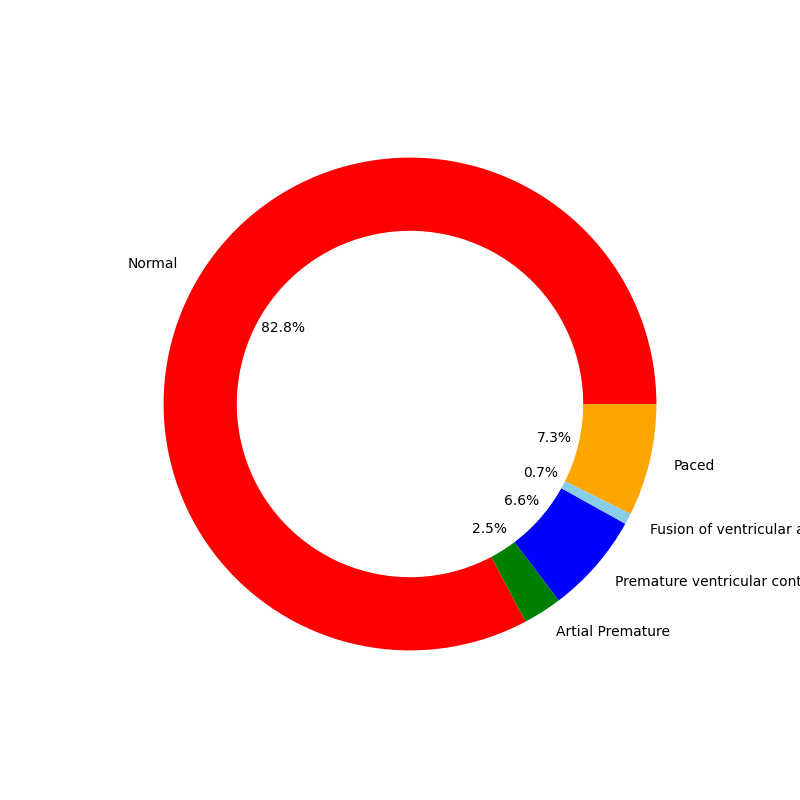

In [21]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_train, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Validation set

In [22]:
valid_y=valid_y.astype(int)
equilibre_valid=valid_y.value_counts(sort=False)
print(equilibre_valid)

0    14475
1      451
2     1153
3      135
4     1297
Name: 187, dtype: int64


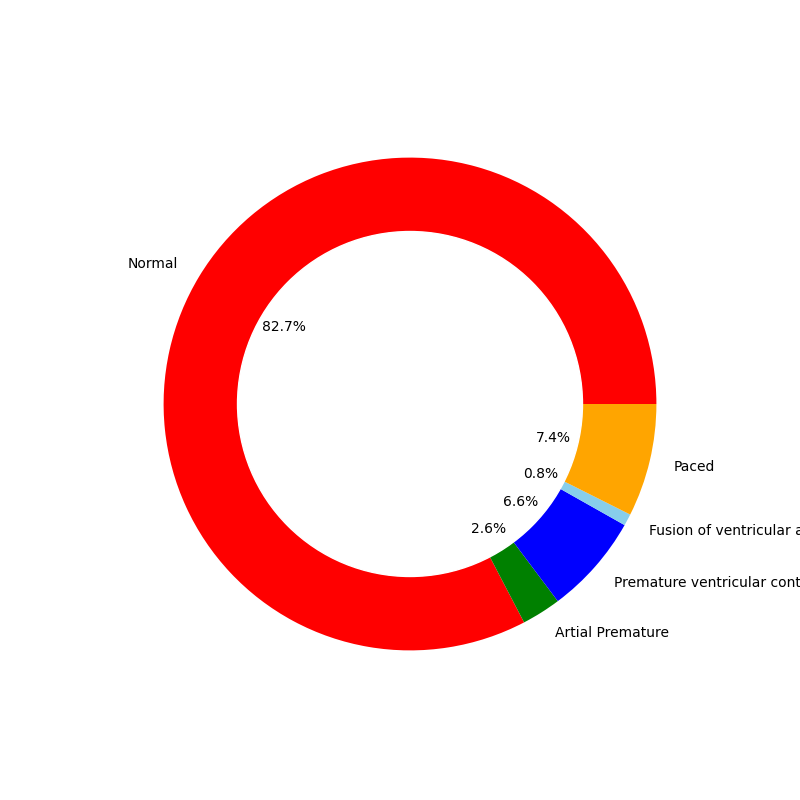

In [23]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_valid, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Testing set

In [24]:
test_df[187]=test_df[187].astype(int)
equilibre_test=test_df[187].value_counts(sort=False)
print(equilibre_test)

0    18118
1      556
2     1448
3      162
4     1608
Name: 187, dtype: int64


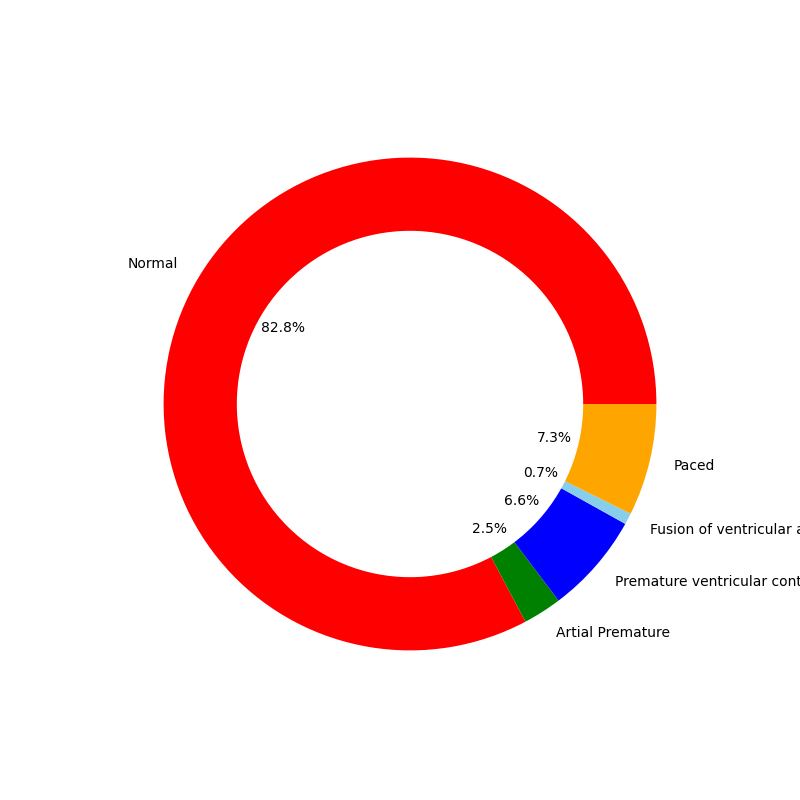

In [25]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_test, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Training some ML Models

### Logistic regression

In [26]:
logreg =LogisticRegression(random_state = 42)
logreg.fit(train_X, train_y)

LogisticRegression(random_state=42)

In [27]:
# Evaluate SVM classifier
y_pred_logreg = logreg.predict(test_X)
print(f'Logistic Regression classifier accuracy: {metrics.accuracy_score(test_y, y_pred_logreg):.5f}')

Logistic Regression classifier accuracy: 0.91298


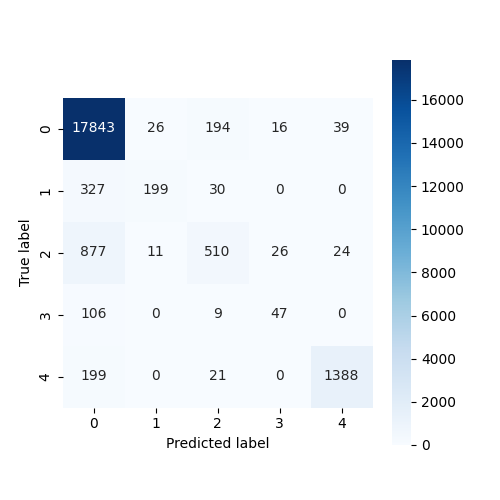

In [28]:
# Calculate confusion matrix
cm = confusion_matrix(test_y, y_pred_logreg)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [29]:
print(classification_report(test_y, y_pred_logreg, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.92      0.98      0.95     18118
                 Artial Premature       0.84      0.36      0.50       556
Premature ventricular contraction       0.67      0.35      0.46      1448
 Fusion of ventricular and normal       0.53      0.29      0.37       162
                            Paced       0.96      0.86      0.91      1608

                         accuracy                           0.91     21892
                        macro avg       0.78      0.57      0.64     21892
                     weighted avg       0.90      0.91      0.90     21892



### SVM

In [32]:
# Train SVM classifier
svm = SVC(kernel='poly', C=1)
svm.fit(train_X, train_y)

SVM classifier accuracy: 0.96446


In [33]:
y_pred_svm = svm.predict(test_X)
print(f'SVM classifier accuracy: {metrics.accuracy_score(test_y, y_pred_svm):.5f}')

SVM classifier accuracy: 0.96446


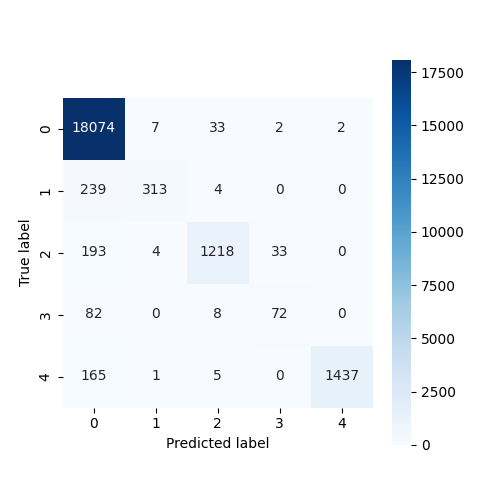

In [34]:
# Calculate confusion matrix
cm = confusion_matrix(test_y, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [35]:
print(classification_report(test_y, y_pred_svm, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.96      1.00      0.98     18118
                 Artial Premature       0.96      0.56      0.71       556
Premature ventricular contraction       0.96      0.84      0.90      1448
 Fusion of ventricular and normal       0.67      0.44      0.54       162
                            Paced       1.00      0.89      0.94      1608

                         accuracy                           0.96     21892
                        macro avg       0.91      0.75      0.81     21892
                     weighted avg       0.96      0.96      0.96     21892



## Random Forest

In [38]:
# Train random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfc.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [39]:
y_pred_rfc = rfc.predict(test_X)
print(f'SVM classifier accuracy: {metrics.accuracy_score(test_y, y_pred_rfc):.5f}')

SVM classifier accuracy: 0.97323


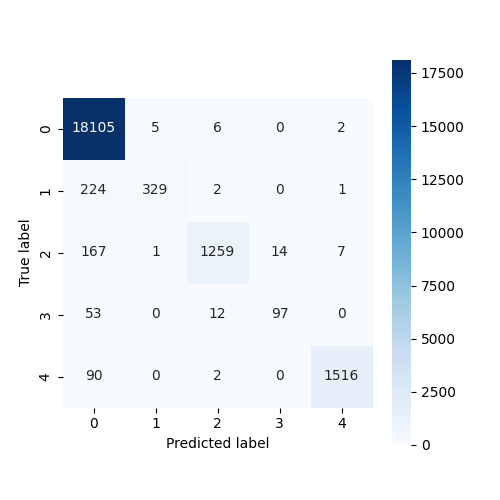

In [40]:
# Calculate confusion matrix
cm = confusion_matrix(test_y, y_pred_rfc)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [41]:
print(classification_report(test_y, y_pred_rfc, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.97      1.00      0.99     18118
                 Artial Premature       0.98      0.59      0.74       556
Premature ventricular contraction       0.98      0.87      0.92      1448
 Fusion of ventricular and normal       0.87      0.60      0.71       162
                            Paced       0.99      0.94      0.97      1608

                         accuracy                           0.97     21892
                        macro avg       0.96      0.80      0.86     21892
                     weighted avg       0.97      0.97      0.97     21892



## CNN

In [42]:
im_shape=(train_X.shape[1],1)
inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
conv1_1=BatchNormalization()(conv1_1)
pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
conv2_1=BatchNormalization()(conv2_1)
pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
conv3_1=BatchNormalization()(conv3_1)
pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
flatten=Flatten()(pool3)
dense_end1 = Dense(64, activation='relu')(flatten)
dense_end2 = Dense(32, activation='relu')(dense_end1)
main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)


model = Model(inputs= inputs_cnn, outputs=main_output)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])


callbacks = [EarlyStopping(monitor='val_loss', patience=8),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history=model.fit(train_X, train_y_nn, epochs=40,callbacks=callbacks, batch_size=32,validation_data=(valid_X,valid_y_nn))
model.load_weights('best_model.h5')

Epoch 1/40
2189/2189 [==============================] - 20s 7ms/step - loss: 0.1351 - accuracy: 0.9620 - val_loss: 0.1041 - val_accuracy: 0.9693
Epoch 2/40
2189/2189 [==============================] - 13s 6ms/step - loss: 0.0762 - accuracy: 0.9784 - val_loss: 0.0694 - val_accuracy: 0.9804
Epoch 3/40
2189/2189 [==============================] - 16s 7ms/step - loss: 0.0602 - accuracy: 0.9821 - val_loss: 0.0893 - val_accuracy: 0.9751
Epoch 4/40
2189/2189 [==============================] - 17s 8ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.1162 - val_accuracy: 0.9644
Epoch 5/40
2189/2189 [==============================] - 16s 7ms/step - loss: 0.0417 - accuracy: 0.9874 - val_loss: 0.0630 - val_accuracy: 0.9817
Epoch 6/40
2189/2189 [==============================] - 17s 8ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0584 - val_accuracy: 0.9845
Epoch 7/40
2189/2189 [==============================] - 15s 7ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0584 - val_ac

In [33]:
scores = model.evaluate(test_X, test_y_nn, verbose=0)
print("Accuracy: %.5f%%" % (scores[1]*100))


Accuracy: 98.12260%


685/685 [==============================] - 1s 2ms/step


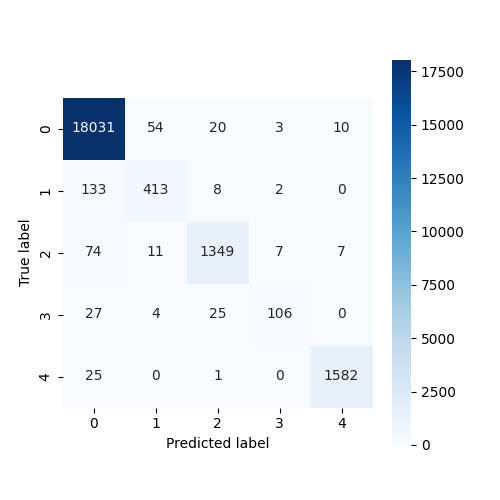

In [34]:
# Predict test set labels
y_pred = model.predict(test_X)
y_pred_cnn = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(test_y, y_pred_cnn)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [35]:
print(classification_report(test_df[187], y_pred_cnn, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.99      1.00      0.99     18118
                 Artial Premature       0.86      0.74      0.80       556
Premature ventricular contraction       0.96      0.93      0.95      1448
 Fusion of ventricular and normal       0.90      0.65      0.76       162
                            Paced       0.99      0.98      0.99      1608

                         accuracy                           0.98     21892
                        macro avg       0.94      0.86      0.90     21892
                     weighted avg       0.98      0.98      0.98     21892



# CNN 2

In [65]:
n_obs, feature = train_X.shape
batch_size = 500

In [66]:
inp = Input(shape=(feature, 1))
C = Convolution1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPool1D(pool_size=5, strides=2)(A12)


C21 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S11)
M21 = MaxPool1D(pool_size=5, strides=2)(A22)


C31 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPool1D(pool_size=5, strides=2)(A32)


C41 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPool1D(pool_size=5, strides=2)(A42)


C51 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Convolution1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPool1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=inp, outputs=A7)

In [67]:
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size)  # every epoch we do n_obs/batch_size iteration
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

lrate = LearningRateScheduler(exp_decay)

In [68]:
adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [69]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [71]:
history = model.fit(train_X, train_y_nn, 
                    epochs=75, 
                    batch_size=batch_size, 
                    verbose=2, 
                    validation_data=(valid_X, valid_y_nn), 
                    callbacks=[lrate])

Epoch 1/75


ValueError: Creating variables on a non-first call to a function decorated with tf.function.